# Understanding Descriptive Statistics

Import the necessary libraries here:

In [102]:
# Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import plotly.express as px
from plotly.subplots import make_subplots
import cufflinks as cf
import seaborn as sns
cf.go_offline()
%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [2]:
def dice(times):
    solution = []
    for i in range(times):
        solution.append(random.randint(1,6))
    return solution

In [3]:
dice = pd.DataFrame({"cara_dado": dice(10)})


In [4]:
dice

,cara_dado
0,3
1,2
2,1
3,4
4,3
5,5
6,1
7,6
8,3
9,1


#### 2.- Plot the results sorted by value.

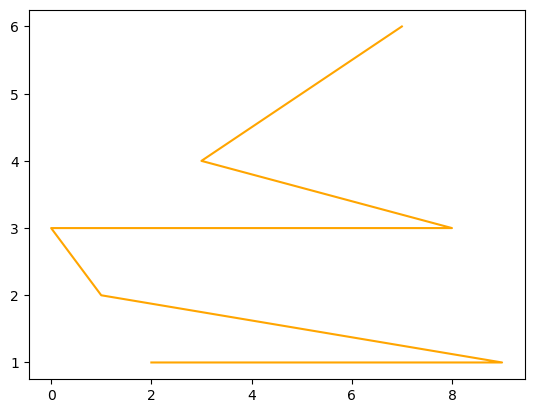

In [5]:
#Doesn't specify the kind of plot...

plt.plot(dice.sort_values(by = "cara_dado"), color = "orange")

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

In [6]:
#Calculating frequency distribution?

def frequency(column):
    frequency = {}
    for i in list(column):
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

In [7]:
frequency(dice["cara_dado"])

{3: 3, 2: 1, 1: 3, 4: 1, 5: 1, 6: 1}

In [8]:
fig = px.bar(dice.sort_values(by = "cara_dado"), title='Resultados del Dado (ordenados por valor)')
fig.update_layout(xaxis=dict(tickmode='linear', tick0=1, dtick=1))
fig

In [9]:
"""

The first one is really confusing but the histogram represents quite good the distribution of frequency. It says
it is the representative chart for that kind of task.

"""

'\n\nThe first one is really confusing but the histogram represents quite good the distribution of frequency. It says\nit is the representative chart for that kind of task.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [10]:
#mean

def mean(colum):
    total_sum = colum.sum()
    total_number = colum.count()
    return total_sum / total_number

In [11]:
mean(dice["cara_dado"])

2.9

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [12]:
# Calculating again the frequency distribution:

def frequency(column):
    frequency = {}
    for i in list(column):
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

In [13]:
freq = frequency(dice["cara_dado"])

In [14]:
freq

{3: 3, 2: 1, 1: 3, 4: 1, 5: 1, 6: 1}

In [15]:
values = [k * v for k, v in freq.items()]
values

[9, 2, 3, 4, 5, 6]

In [16]:
#Calculating mean:

def mean():
    return sum(values) / sum(freq.values())

In [17]:
mean()

2.9

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [18]:
l = list(dice["cara_dado"])
l

[3, 2, 1, 4, 3, 5, 1, 6, 3, 1]

In [19]:
#median

def median(l):
    sorted_l = sorted(l)
    if len(sorted(l)) % 2 !=0: #Si el número de observaciones es impar, la mediana es la observación del medio.
        m = sorted_l[len(sorted_l) // 2]
    else: #Si es par, la mediana es la media de las dos observaciones que están en el medio.
        m1 = sorted_l[len(sorted(l)) // 2]
        m2 = sorted_l[(len(sorted(l)) // 2) -1]
        m = (m1+m2) / 2
    return m

In [20]:
median(l)

3.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [21]:
l = list(dice["cara_dado"])
l

[3, 2, 1, 4, 3, 5, 1, 6, 3, 1]

In [22]:
lower_half = l[:len(l) // 2]
lower_half
upper_half = l[len(l)//2+1:]
upper_half

[1, 6, 3, 1]

In [23]:
#Quartiles

def quartiles(l):
    sorted_l = sorted(l)
    q2 = median(sorted_l)
    
    lower_half = sorted_l[:len(sorted_l) // 2]
    upper_half = sorted_l[len(sorted_l)//2+1:]
    
    q1 = median(lower_half)
    q2 = median(sorted_l)
    q3 = median(upper_half)
    
    return q1, q2, q3

In [24]:
quartiles(l)

(1, 3.0, 4.5)

In [25]:
#To corroborate:

dice.describe()

,cara_dado
count,10.00000
mean,2.90000
std,1.72884
min,1.00000
25%,1.25000
50%,3.00000
75%,3.75000
max,6.00000


## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [26]:
# Reading file and storing it as a dataframe

dice_hundred = pd.read_csv("../data/roll_the_dice_hundred.csv")
dice_hundred.head(5)

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


In [27]:
dice_hundred.describe()

,Unnamed: 0,roll,value
count,100.000000,100.000000,100.000000
mean,49.500000,49.500000,3.740000
std,29.011492,29.011492,1.703354
min,0.000000,0.000000,1.000000
25%,24.750000,24.750000,2.000000
50%,49.500000,49.500000,4.000000
75%,74.250000,74.250000,5.000000
max,99.000000,99.000000,6.000000


In [28]:
fig = px.bar(dice_hundred.sort_values(by="value"), x = "roll", y = "value", title='Resultados del Dado (ordenados por valor)')
fig

In [29]:
"""
The sample is so big it really tells us nothing...
"""

'\nThe sample is so big it really tells us nothing...\n'

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [30]:
def mean(colum):
    total_sum = colum.sum()
    total_number = colum.count()
    return total_sum / total_number

In [31]:
# mean value of the hundred dice rolls

mean(dice_hundred["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [32]:
def frequency(column):
    frequency = {}
    for i in list(column):
        if i in frequency:
            frequency[i] += 1
        else:
            frequency[i] = 1
    return frequency

In [33]:
f = frequency(dice_hundred["value"])
sorted_f = dict(sorted(f.items()))
sorted_f

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

In [34]:
new_f = {key: key / value for key, value in sorted_f.items()}
new_f

{1: 0.08333333333333333,
 2: 0.11764705882352941,
 3: 0.21428571428571427,
 4: 0.18181818181818182,
 5: 0.4166666666666667,
 6: 0.2608695652173913}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

In [35]:
fig = px.bar(dice_hundred.sort_values(by="value"), x = "roll", y = "value", title='Resultados del Dado (ordenados por valor)')
fig

In [36]:
"""
Again, I think this representation tells us nothing 
because the number of values taken in consideration 
is too big. 
Nevertheless, I suposse the mean is conected to 
this result because 4 and 6 are the most common results.
Another thing I see is that, on the right part of the 
graph the values are more similar, 
or there is some kind of pattern that becomes clearer
the more times you roll the dice?
"""

'\nAgain, I think this representation tells us nothing \nbecause the number of values taken in consideration \nis too big. \nNevertheless, I suposse the mean is conected to \nthis result because 4 and 6 are the most common results.\nAnother thing I see is that, on the right part of the \ngraph the values are more similar, \nor there is some kind of pattern that becomes clearer\nthe more times you roll the dice?\n'

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [37]:
dice_thousand = pd.read_csv("../data/roll_the_dice_thousand.csv")
dice_thousand.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [38]:
dice_thousand.describe()

,Unnamed: 0,roll,value
count,1000.000000,1000.000000,1000.000000
mean,499.500000,499.500000,3.447000
std,288.819436,288.819436,1.711175
min,0.000000,0.000000,1.000000
25%,249.750000,249.750000,2.000000
50%,499.500000,499.500000,3.000000
75%,749.250000,749.250000,5.000000
max,999.000000,999.000000,6.000000


In [39]:
f = frequency(dice_thousand["value"])
sorted_f = dict(sorted(f.items()))
sorted_f

{1: 175, 2: 167, 3: 175, 4: 168, 5: 149, 6: 166}

In [40]:
new_f = {key: key / value for key, value in sorted_f.items()}
new_f

{1: 0.005714285714285714,
 2: 0.011976047904191617,
 3: 0.017142857142857144,
 4: 0.023809523809523808,
 5: 0.03355704697986577,
 6: 0.03614457831325301}

In [41]:
"""
Comparing this with the frequencies of the 100 dice 
rolls, I can observe that the frequencies are closer 
to each other. However, I don't understand why the 
frequencies here deviate further from the ideal 
distribution of 1/6 for each value when it should be 
the opposite. Additionally, I believe that the larger 
sample size makes the inferences and observations more 
reliable.
Also, the mean has decreased.
"""

"\nComparing this with the frequencies of the 100 dice \nrolls, I can observe that the frequencies are closer \nto each other. However, I don't understand why the \nfrequencies here deviate further from the ideal \ndistribution of 1/6 for each value when it should be \nthe opposite. Additionally, I believe that the larger \nsample size makes the inferences and observations more \nreliable.\nAlso, the mean has decreased.\n"

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [42]:
ages = pd.read_csv("../data/ages_population.csv")
ages

,observation
0,68.0
1,12.0
2,45.0
3,38.0
4,49.0
...,...
995,27.0
996,47.0
997,53.0
998,33.0


In [43]:
f = frequency(ages["observation"])
sorted_f = dict(sorted(f.items()))
sorted_f

{1.0: 2,
 2.0: 2,
 4.0: 1,
 5.0: 2,
 6.0: 2,
 7.0: 1,
 8.0: 5,
 9.0: 2,
 10.0: 3,
 11.0: 3,
 12.0: 11,
 13.0: 6,
 14.0: 10,
 15.0: 8,
 16.0: 8,
 17.0: 10,
 18.0: 7,
 19.0: 11,
 20.0: 13,
 21.0: 14,
 22.0: 16,
 23.0: 17,
 24.0: 18,
 25.0: 19,
 26.0: 23,
 27.0: 25,
 28.0: 20,
 29.0: 26,
 30.0: 34,
 31.0: 24,
 32.0: 30,
 33.0: 22,
 34.0: 29,
 35.0: 33,
 36.0: 31,
 37.0: 30,
 38.0: 30,
 39.0: 45,
 40.0: 27,
 41.0: 36,
 42.0: 32,
 43.0: 32,
 44.0: 23,
 45.0: 29,
 46.0: 23,
 47.0: 17,
 48.0: 19,
 49.0: 19,
 50.0: 16,
 51.0: 9,
 52.0: 14,
 53.0: 12,
 54.0: 13,
 55.0: 13,
 56.0: 15,
 57.0: 7,
 58.0: 7,
 59.0: 8,
 60.0: 4,
 61.0: 2,
 62.0: 4,
 63.0: 7,
 64.0: 2,
 65.0: 2,
 66.0: 3,
 67.0: 4,
 68.0: 3,
 69.0: 1,
 70.0: 1,
 71.0: 1,
 73.0: 1,
 82.0: 1}

In [95]:
fig1 = px.histogram(ages, x = "observation", nbins=10, marginal = "box")
fig1.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.7)
fig1

In [45]:
"""
I guess the mean will be around 30 
something and the standard deviation around 10 or 15? 
(the standard deviation gives me more trouble)
"""

'\nI guess the mean will be around 30 \nsomething and the standard deviation around 10 or 15? \n(the standard deviation gives me more trouble)\n'

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [46]:
mean = mean(ages["observation"])
mean

36.56

In [47]:
s_d = np.std(ages["observation"])
s_d

12.81008977329979

In [48]:
"""
The mean was more or less what I predicted.
The standard deviation is in the range I predicted, but 
with less precision.

"""

'\nThe mean was more or less what I predicted.\nThe standard deviation is in the range I predicted, but \nwith less precision.\n\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [49]:
ages2 = pd.read_csv("../data/ages_population2.csv")
ages2

,observation
0,25.0
1,31.0
2,29.0
3,31.0
4,29.0
...,...
995,26.0
996,22.0
997,21.0
998,19.0


In [50]:
f = frequency(ages2["observation"])
sorted_f = dict(sorted(f.items()))
sorted_f

{19.0: 3,
 20.0: 13,
 21.0: 17,
 22.0: 35,
 23.0: 41,
 24.0: 78,
 25.0: 98,
 26.0: 120,
 27.0: 125,
 28.0: 139,
 29.0: 115,
 30.0: 90,
 31.0: 61,
 32.0: 31,
 33.0: 22,
 34.0: 7,
 35.0: 3,
 36.0: 2}

In [96]:
fig2 = px.histogram(ages2, x = "observation", nbins=10, marginal = "box")
fig2.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.7)
fig2

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [52]:
"""
Yes, the dataframe has much less observations, 
and they start at a higher age and stop at a lower age.
"""

'\nYes, the dataframe has much less observations, \nand they start at a higher age and stop at a lower age.\n'

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [56]:
np.mean(ages2["observation"])

27.155

In [58]:
np.std(ages2["observation"])

2.9683286543103704

In [ ]:
"""
The mean is much lower, and also the standard deviation
because the ages are very similar.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [59]:
ages3 = pd.read_csv("../data/ages_population3.csv")
ages3

,observation
0,21.0
1,21.0
2,24.0
3,31.0
4,54.0
...,...
995,16.0
996,55.0
997,30.0
998,35.0


In [60]:
f = frequency(ages3["observation"])
sorted_f = dict(sorted(f.items()))
sorted_f

{1.0: 1,
 2.0: 2,
 4.0: 2,
 5.0: 1,
 7.0: 1,
 8.0: 1,
 9.0: 1,
 10.0: 2,
 11.0: 2,
 12.0: 4,
 13.0: 2,
 14.0: 5,
 15.0: 8,
 16.0: 9,
 17.0: 10,
 18.0: 9,
 19.0: 12,
 20.0: 11,
 21.0: 14,
 22.0: 11,
 23.0: 11,
 24.0: 19,
 25.0: 17,
 26.0: 15,
 27.0: 19,
 28.0: 18,
 29.0: 25,
 30.0: 24,
 31.0: 21,
 32.0: 37,
 33.0: 17,
 34.0: 20,
 35.0: 31,
 36.0: 26,
 37.0: 31,
 38.0: 25,
 39.0: 29,
 40.0: 21,
 41.0: 25,
 42.0: 14,
 43.0: 22,
 44.0: 17,
 45.0: 24,
 46.0: 22,
 47.0: 15,
 48.0: 25,
 49.0: 18,
 50.0: 21,
 51.0: 14,
 52.0: 17,
 53.0: 14,
 54.0: 9,
 55.0: 13,
 56.0: 10,
 57.0: 8,
 58.0: 6,
 59.0: 8,
 60.0: 6,
 61.0: 6,
 62.0: 3,
 63.0: 12,
 64.0: 12,
 65.0: 15,
 66.0: 19,
 67.0: 22,
 68.0: 17,
 69.0: 17,
 70.0: 19,
 71.0: 11,
 72.0: 8,
 73.0: 6,
 74.0: 6,
 75.0: 2,
 76.0: 1,
 77.0: 2}

In [97]:
fig3 = px.histogram(ages3, x = "observation", nbins=10, marginal = "box")
fig3.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.7)
fig3

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [62]:
np.mean(ages3["observation"])

41.989

In [63]:
np.std(ages3["observation"])

16.136631587788084

In [ ]:
"""
Both the mean and the standard
deviation are higher than in ages1.
The observated ages start and end like ages1, but
there are a lot more of observation of old ages than in
the first dataframes. That is what makes the mean higher. 

"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [64]:
def quartiles(l):
    sorted_l = sorted(l)
    q2 = median(sorted_l)
    
    lower_half = sorted_l[:len(sorted_l) // 2]
    upper_half = sorted_l[len(sorted_l)//2+1:]
    
    q1 = median(lower_half)
    q2 = median(sorted_l)
    q3 = median(upper_half)
    
    return q1, q2, q3

In [67]:
quartiles_ages3 = quartiles(list(ages3["observation"]))
quartiles_ages3

(30.0, 40.0, 53.0)

In [69]:
quartiles_ages1 = quartiles(list(ages["observation"]))
quartiles_ages1

(28.0, 37.0, 45.0)

{'whiskers': [<matplotlib.lines.Line2D at 0x11f05ab50>,
 'caps': [<matplotlib.lines.Line2D at 0x11f0687d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x11f05ac50>,
 'medians': [<matplotlib.lines.Line2D at 0x11f0698d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11f06a190>,
 'means': []}

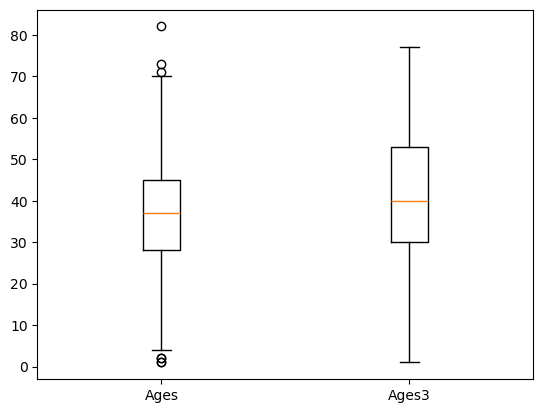

In [71]:
plt.boxplot([ages['observation'], ages3['observation']], labels=['Ages', 'Ages3'])


In [ ]:
"""
The median is higher on the last dataframe than in the
first one. Also, there is much more data from ages 45-80 
in the last one. 
In the last dataframe, there are much more ages higher than the median
than in the first dataframe. 

"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [82]:
deciles1 = np.percentile(ages, range(1,10))
deciles1

array([ 7.99, 10.98, 12.  , 13.96, 14.95, 16.  , 17.  , 18.  , 19.  ])

In [84]:
deciles3 = np.percentile(ages3, range(1,10))
deciles3

array([10.  , 14.  , 15.  , 16.  , 17.  , 18.94, 19.  , 20.  , 21.  ])

In [ ]:
"""
In general, percentiles are higher on the third dataframe
than in the first one.
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [88]:
ages_total = ages
ages_total["observation2"] = ages2["observation"]
ages_total["observation3"] = ages3["observation"]
ages_total

,observation,observation2,observation3
0,68.0,25.0,21.0
1,12.0,31.0,21.0
2,45.0,29.0,24.0
3,38.0,31.0,31.0
4,49.0,29.0,54.0
...,...,...,...
995,27.0,26.0,16.0
996,47.0,22.0,55.0
997,53.0,21.0,30.0
998,33.0,19.0,35.0


In [107]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Observation', 'Observation2', 'Observation3'))

for i, column in enumerate(ages_total.columns, start=1):
    hist = px.histogram(ages_total, x=column, nbins=20, labels={'value': 'Edad', 'variable': 'Observación'})
    fig.add_trace(hist['data'][0], row=1, col=i)
fig.update_traces(marker_line_color='black', marker_line_width=1.5, opacity=0.7)
fig.update_layout(title_text='Edades según barrio')

fig.show()

In [111]:
fig = make_subplots(rows=1, cols=3, subplot_titles=('Observation', 'Observation2', 'Observation3'))

for i, column in enumerate(ages_total.columns, start=1):
    box = px.box(ages_total, y=column, labels={'value': 'Edad', 'variable': 'Observación'})
    fig.add_trace(box['data'][0], row=1, col=i)
fig.update_layout(title_text='Edades según barrio')

fig.show()

In [110]:
describe = ages_total.describe()
describe

,observation,observation2,observation3
count,1000.0000,1000.000000,1000.000000
mean,36.5600,27.155000,41.989000
std,12.8165,2.969814,16.144706
min,1.0000,19.000000,1.000000
25%,28.0000,25.000000,30.000000
50%,37.0000,27.000000,40.000000
75%,45.0000,29.000000,53.000000
max,82.0000,36.000000,77.000000


In [ ]:
"""
Observing the data provided for the three 
neighborhoods, we can make the following observations:

#First Neighborhood:

The first neighborhood has a diverse population of all 
ages, with a mean age of 36 years.
The standard deviation indicates that the age data 
is not highly dispersed.

#Second Neighborhood:

The second neighborhood has a mean age of 27 years and 
shows a notable absence of children and older 
individuals.
This suggests it may be a new neighborhood, possibly 
located on the outskirts of the city. It appears to be 
a residential area with a young population that has 
not yet started families.
This neighborhood has the lowest standard deviation, 
indicating that the ages are closely grouped together 
due to the absence of children and older individuals.

#Third Neighborhood:

The third neighborhood is characterized by an older 
population, with a mean age of 41 years.
It has a mix of children, young people, and older 
individuals, suggesting it might be one of the city's 
oldest neighborhoods. Residents may have purchased 
homes when they were more affordable, and now they 
live with their children or grandchildren.
This observation could explain the absence of older 
individuals in the other two neighborhoods. It's 
possible that the third neighborhood has more 
retirement homes, which might not be present in the 
other areas.
The third neighborhood has the highest standard 
deviation, reflecting the diverse age groups present.

"""